In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

In [3]:
# reading the data
df = pd.read_csv("churn.csv")

# 1- EDA

In [4]:
# The first 5 observation 
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# The size of the data set 
df.shape

(10000, 14)

In [6]:
# Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# Descriptive statistics of the data set
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
5%,500.95000,1.557882e+07,489.000000,25.000000,1.000000,0.000000,1.000000,0.00000,0.000000,9851.818500,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
90%,9000.10000,1.579083e+07,778.000000,53.000000,9.000000,149244.792000,2.000000,1.00000,1.000000,179674.704000,1.000000
95%,9500.05000,1.580303e+07,812.000000,60.000000,9.000000,162711.669000,2.000000,1.00000,1.000000,190155.375500,1.000000


In [8]:
# categorical Variables
categorical_variables = [col for col in df.columns if col in "O"
                        or df[col].nunique() <=11
                        and col not in "Exited"]

categorical_variables

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

In [9]:
# Numeric Variables
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >11
                        and col not in "CustomerId"]
numeric_variables

['RowNumber', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary']

### Exited (Dependent Variable)

In [10]:
df["Exited"].value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Churn Ratio')

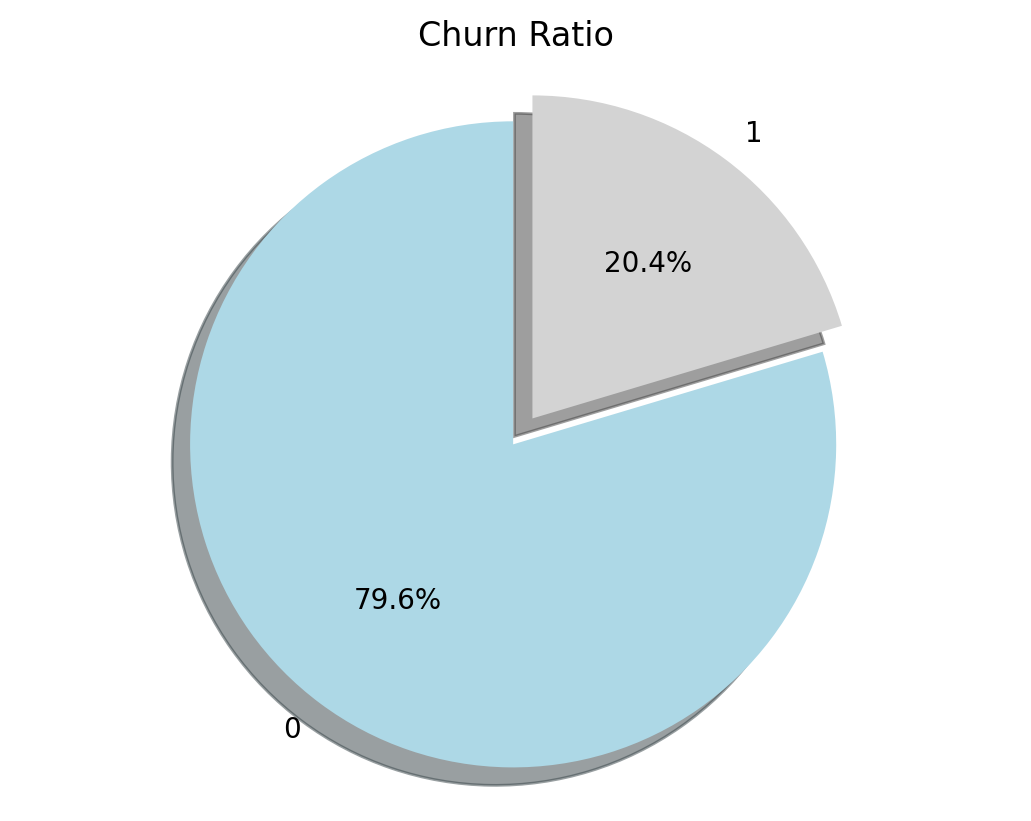

In [11]:
labels = df["Exited"].value_counts().index
sizes = df["Exited"].value_counts().values
colors = ['lightblue', 'lightgray']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Churn Ratio")

In [12]:
# Customers leaving the bank
churn = df.loc[df["Exited"]==1]

In [13]:
# Customers who did not leave the bank
not_churn = df.loc[df["Exited"]==0]

<Axes: xlabel='Exited', ylabel='count'>

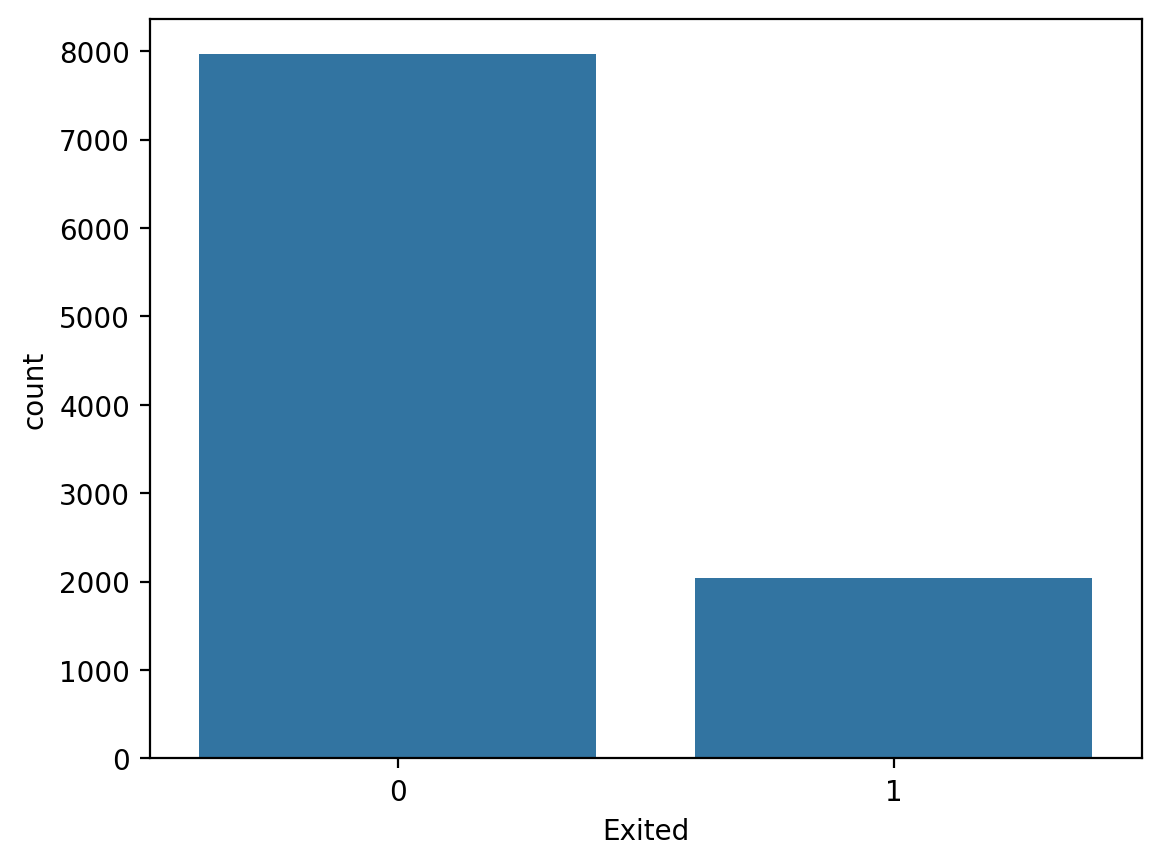

In [14]:
sns.countplot(df, x = df['Exited'])

# Categorical Variables

## Tenure

<Axes: xlabel='count', ylabel='Tenure'>

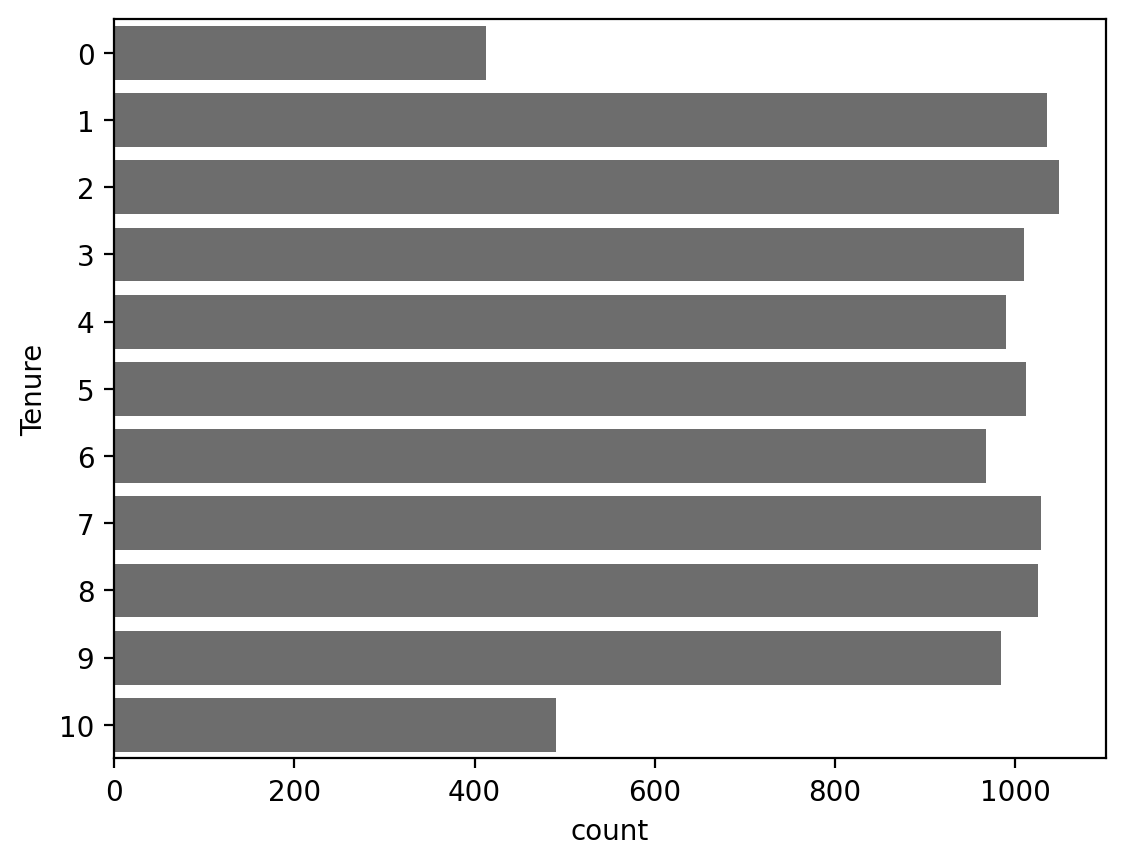

In [15]:
# count plot of the variable Tenure
color = sns.color_palette('gray')[2]
sns.countplot(df, y='Tenure',color=color)

In [16]:
df['Tenure'].value_counts(normalize=True).sort_values(ascending=True)

Tenure
0     0.0413
10    0.0490
6     0.0967
9     0.0984
4     0.0989
3     0.1009
5     0.1012
8     0.1025
7     0.1028
1     0.1035
2     0.1048
Name: proportion, dtype: float64

<Axes: xlabel='count', ylabel='Tenure'>

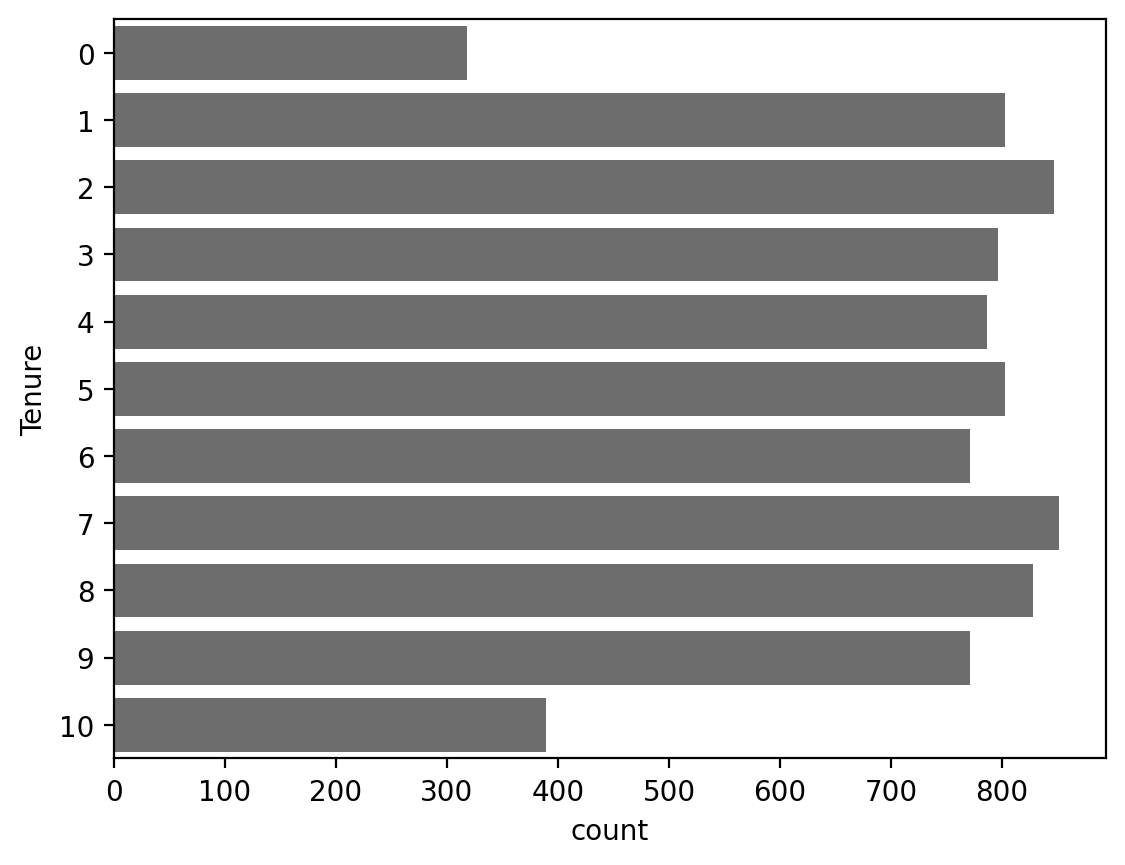

In [17]:
# count plot of the variable Tenure that is not churn
color = sns.color_palette('gray')[2]
sns.countplot(not_churn, y='Tenure',color=color)

In [18]:
# Frequency of not_churn group according to Tenure
not_churn["Tenure"].value_counts().sort_values()

Tenure
0     318
10    389
6     771
9     771
4     786
3     796
1     803
5     803
8     828
2     847
7     851
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Tenure'>

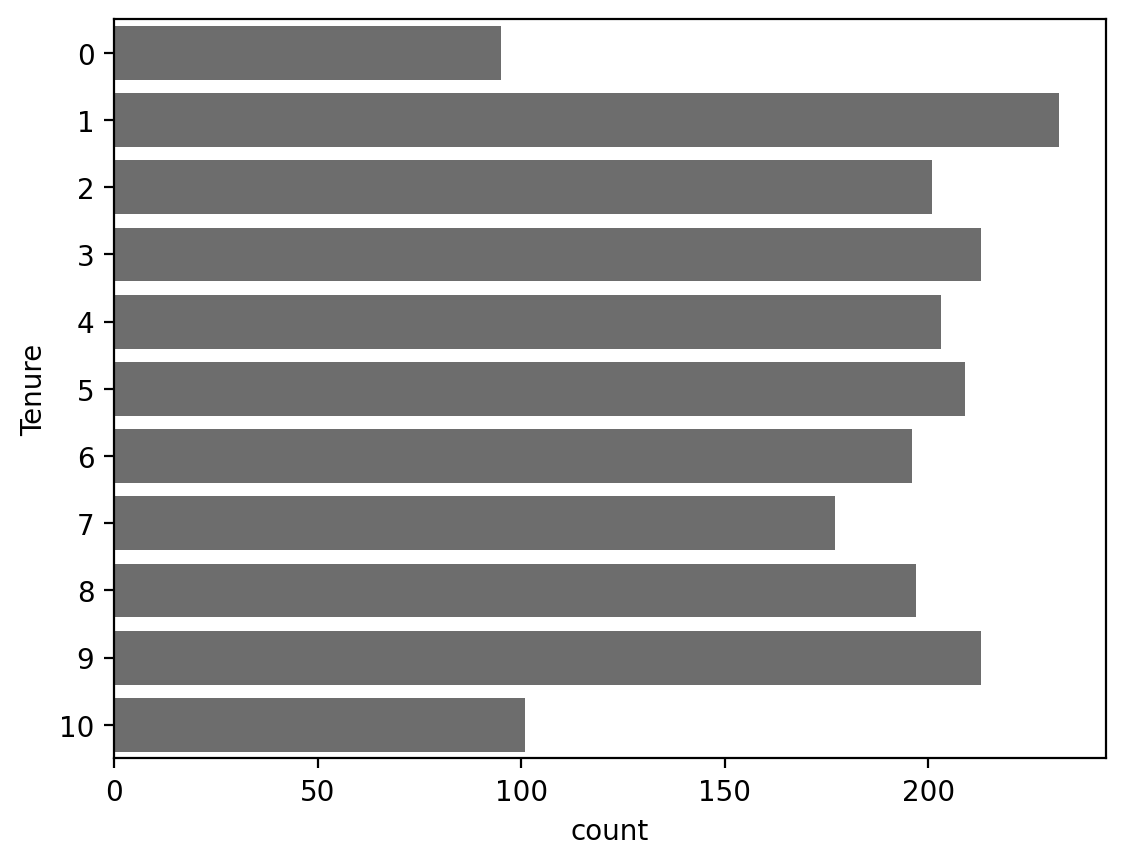

In [19]:
# count plot for variable tenure that in churn
color = sns.color_palette('gray')[2]
sns.countplot(churn, y='Tenure',color=color)

In [20]:
# Frequency of churn group according to Tenure
churn["Tenure"].value_counts().sort_values()

Tenure
0      95
10    101
7     177
6     196
8     197
2     201
4     203
5     209
3     213
9     213
1     232
Name: count, dtype: int64

## NumOfProducts

<Axes: xlabel='count', ylabel='NumOfProducts'>

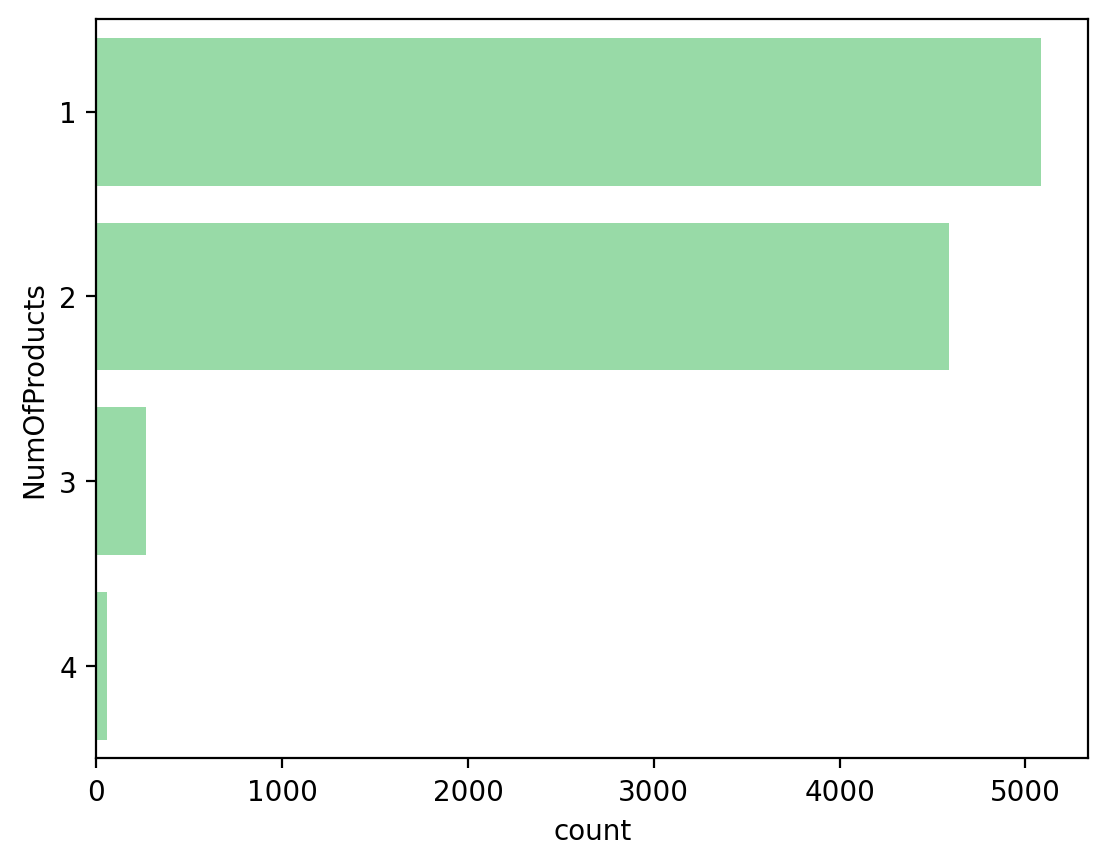

In [21]:
# count plot of the variable NumOfProducts
color = sns.color_palette('pastel')[2]  
sns.countplot(df, y='NumOfProducts',color=color)

In [22]:
# Frequency of not_churn group according to NumOfProducts
not_churn["NumOfProducts"].value_counts().sort_values()

NumOfProducts
3      46
1    3675
2    4242
Name: count, dtype: int64

In [23]:
# Frequency of churn group according to NumOfProducts
churn["NumOfProducts"].value_counts().sort_values()

NumOfProducts
4      60
3     220
2     348
1    1409
Name: count, dtype: int64

## HasCrCard

In [24]:
# examining the HasCrCard of the not_churn group
not_churn["HasCrCard"].value_counts()

HasCrCard
1    5631
0    2332
Name: count, dtype: int64

In [25]:
# examining the HasCrCard of the churn group
churn["HasCrCard"].value_counts()

HasCrCard
1    1424
0     613
Name: count, dtype: int64

## IsActiveMember

In [26]:
# examining the IsActiveMember of the not_churn group
not_churn["IsActiveMember"].value_counts()

IsActiveMember
1    4416
0    3547
Name: count, dtype: int64

In [27]:
# examining the IsActiveMember of the churn group
churn["IsActiveMember"].value_counts()

IsActiveMember
0    1302
1     735
Name: count, dtype: int64

## Geography

In [28]:
# Frequency of not_churn group according to Geography
not_churn.Geography.value_counts().sort_values()

Geography
Germany    1695
Spain      2064
France     4204
Name: count, dtype: int64

In [29]:
# Frequency of churn group according to Geography
churn.Geography.value_counts().sort_values()

Geography
Spain      413
France     810
Germany    814
Name: count, dtype: int64

## Gender

In [30]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [31]:
# Frequency of not_churn group according to Gender
not_churn.Gender.value_counts()

Gender
Male      4559
Female    3404
Name: count, dtype: int64

In [32]:
# Frequency of churn group according to Gender
churn.Gender.value_counts()

Gender
Female    1139
Male       898
Name: count, dtype: int64

# Numerical Variables

## CreditScore

In [33]:
# credit score of the not_churn group
not_churn["CreditScore"].describe()

count    7963.000000
mean      651.853196
std        95.653837
min       405.000000
25%       585.000000
50%       653.000000
75%       718.000000
max       850.000000
Name: CreditScore, dtype: float64

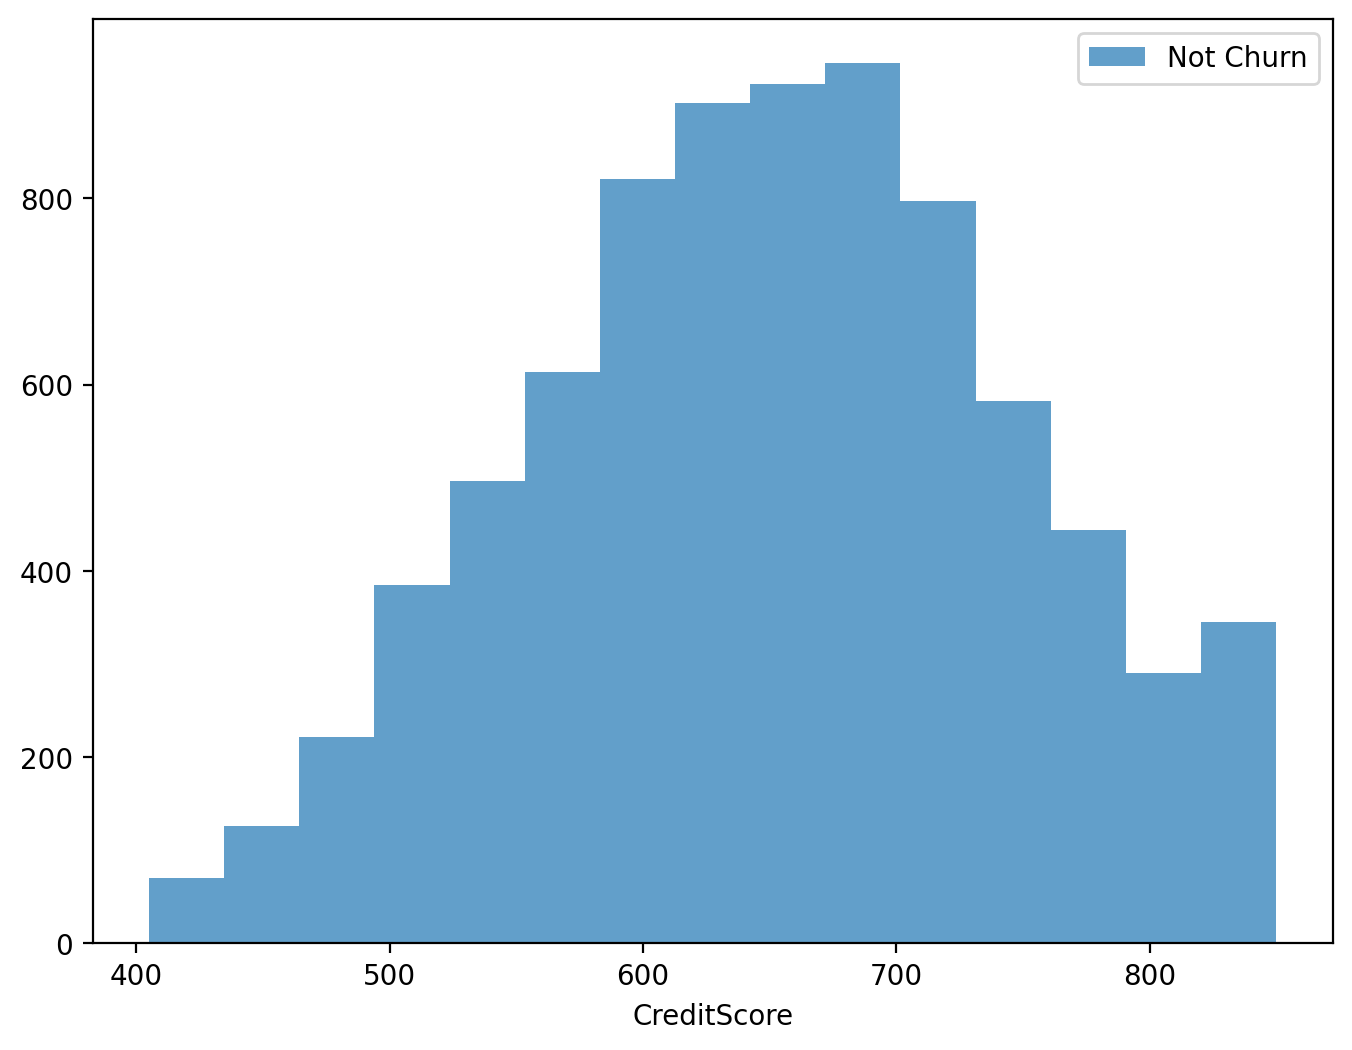

In [34]:
# distribution of the Credit Score for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('CreditScore')
pyplot.hist(not_churn["CreditScore"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [35]:
# Let's examine the credit score of the churn group
churn["CreditScore"].describe()

count    2037.000000
mean      645.351497
std       100.321503
min       350.000000
25%       578.000000
50%       646.000000
75%       716.000000
max       850.000000
Name: CreditScore, dtype: float64

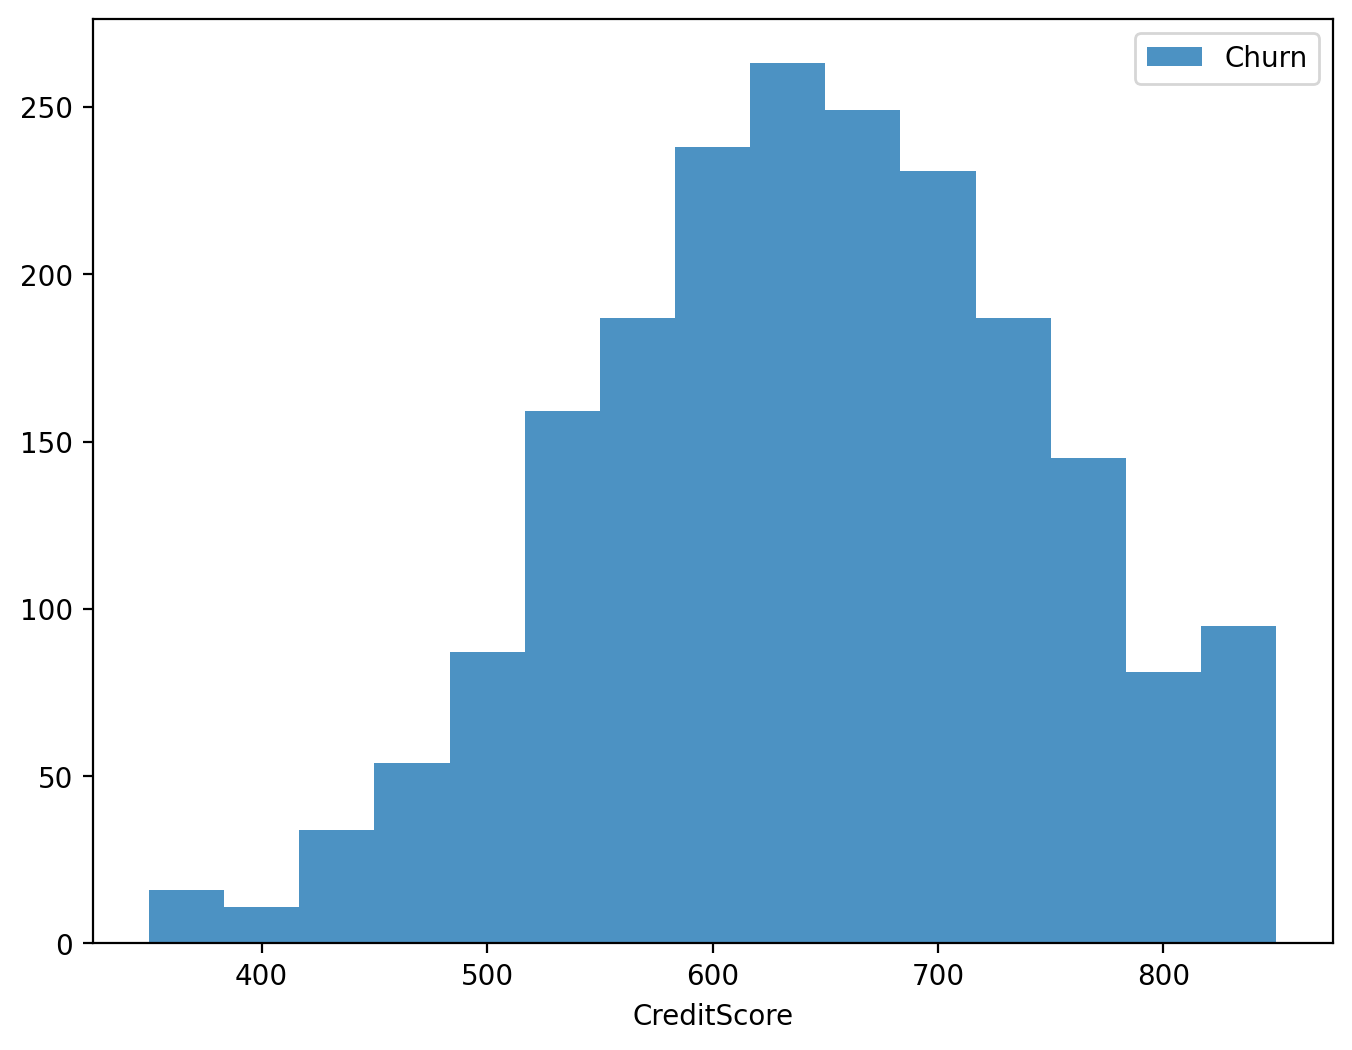

In [36]:
# distribution of the Credit Score for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('CreditScore')
pyplot.hist(churn["CreditScore"],bins=15, alpha=0.8, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

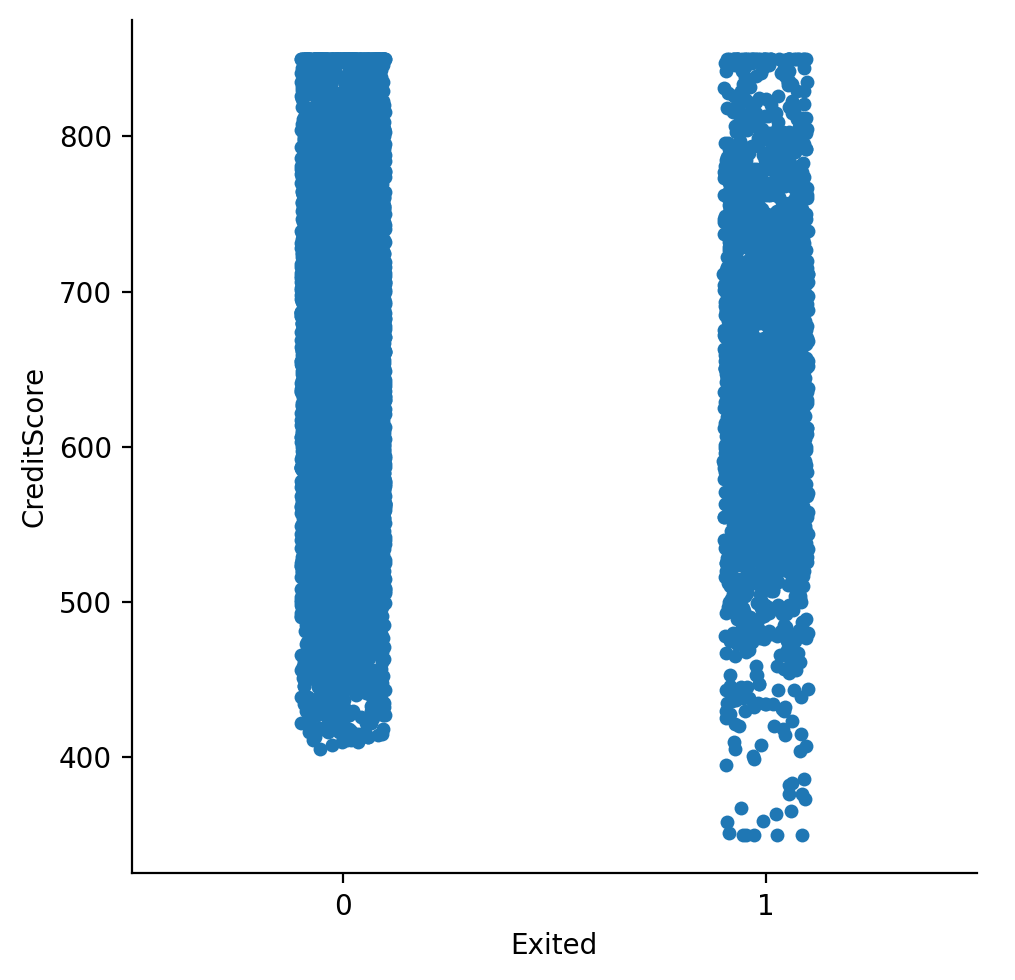

In [37]:

sns.catplot(x = "Exited", y = "CreditScore", data = df)

## Age

In [38]:
# examining the age of the not_churn group
not_churn["Age"].describe()

count    7963.000000
mean       37.408389
std        10.125363
min        18.000000
25%        31.000000
50%        36.000000
75%        41.000000
max        92.000000
Name: Age, dtype: float64

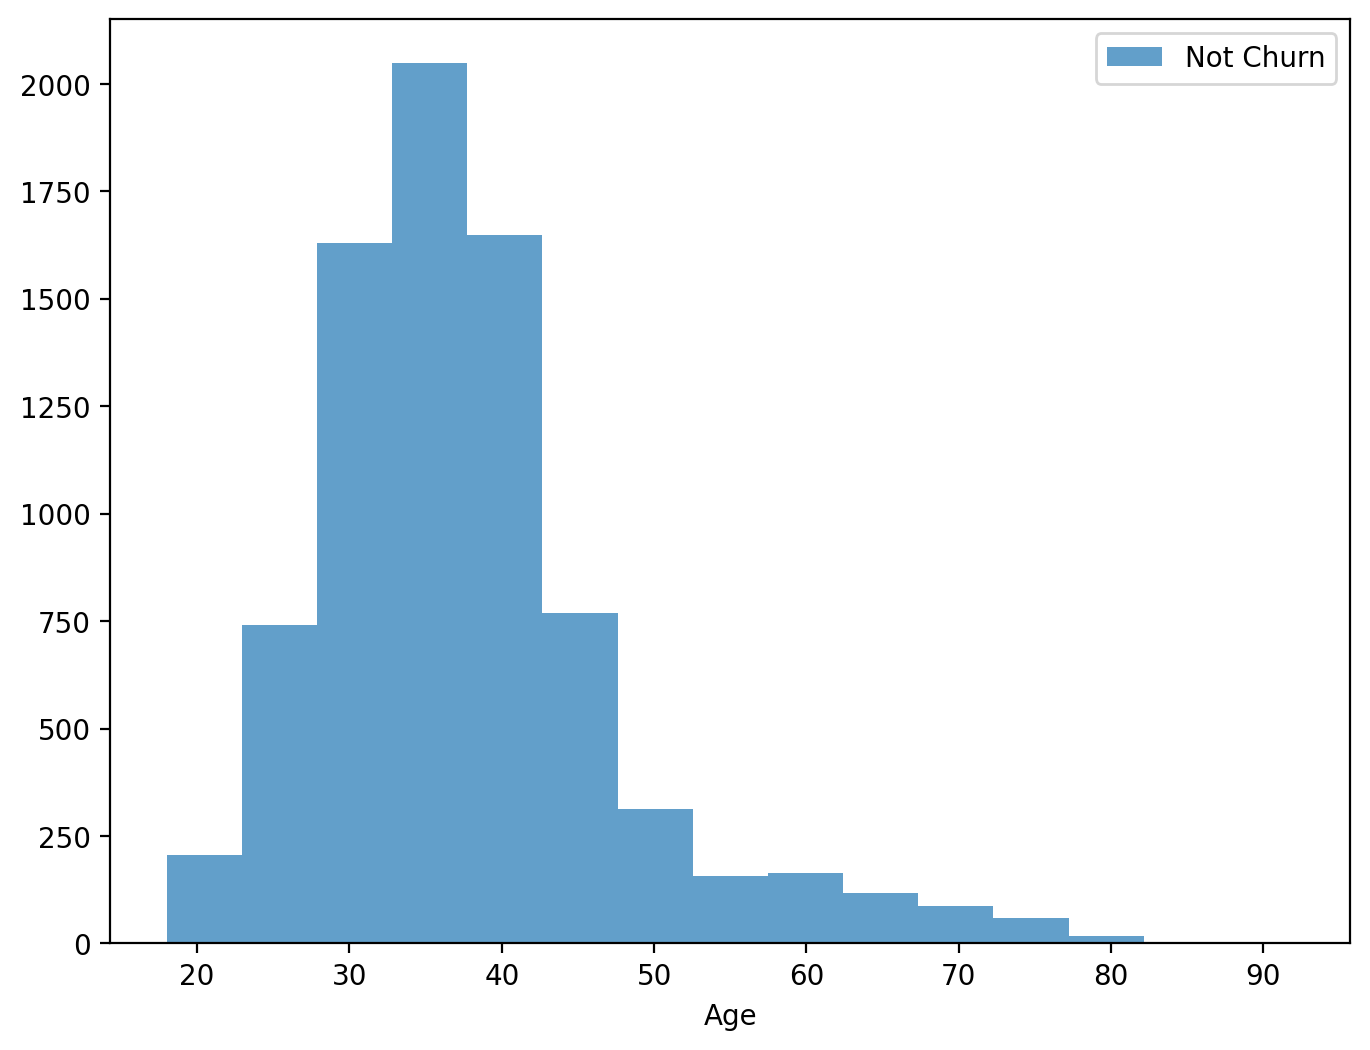

In [39]:
# distribution of the Age for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Age')
pyplot.hist(not_churn["Age"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [40]:
# examine the age of the churn group
churn["Age"].describe()

count    2037.000000
mean       44.837997
std         9.761562
min        18.000000
25%        38.000000
50%        45.000000
75%        51.000000
max        84.000000
Name: Age, dtype: float64

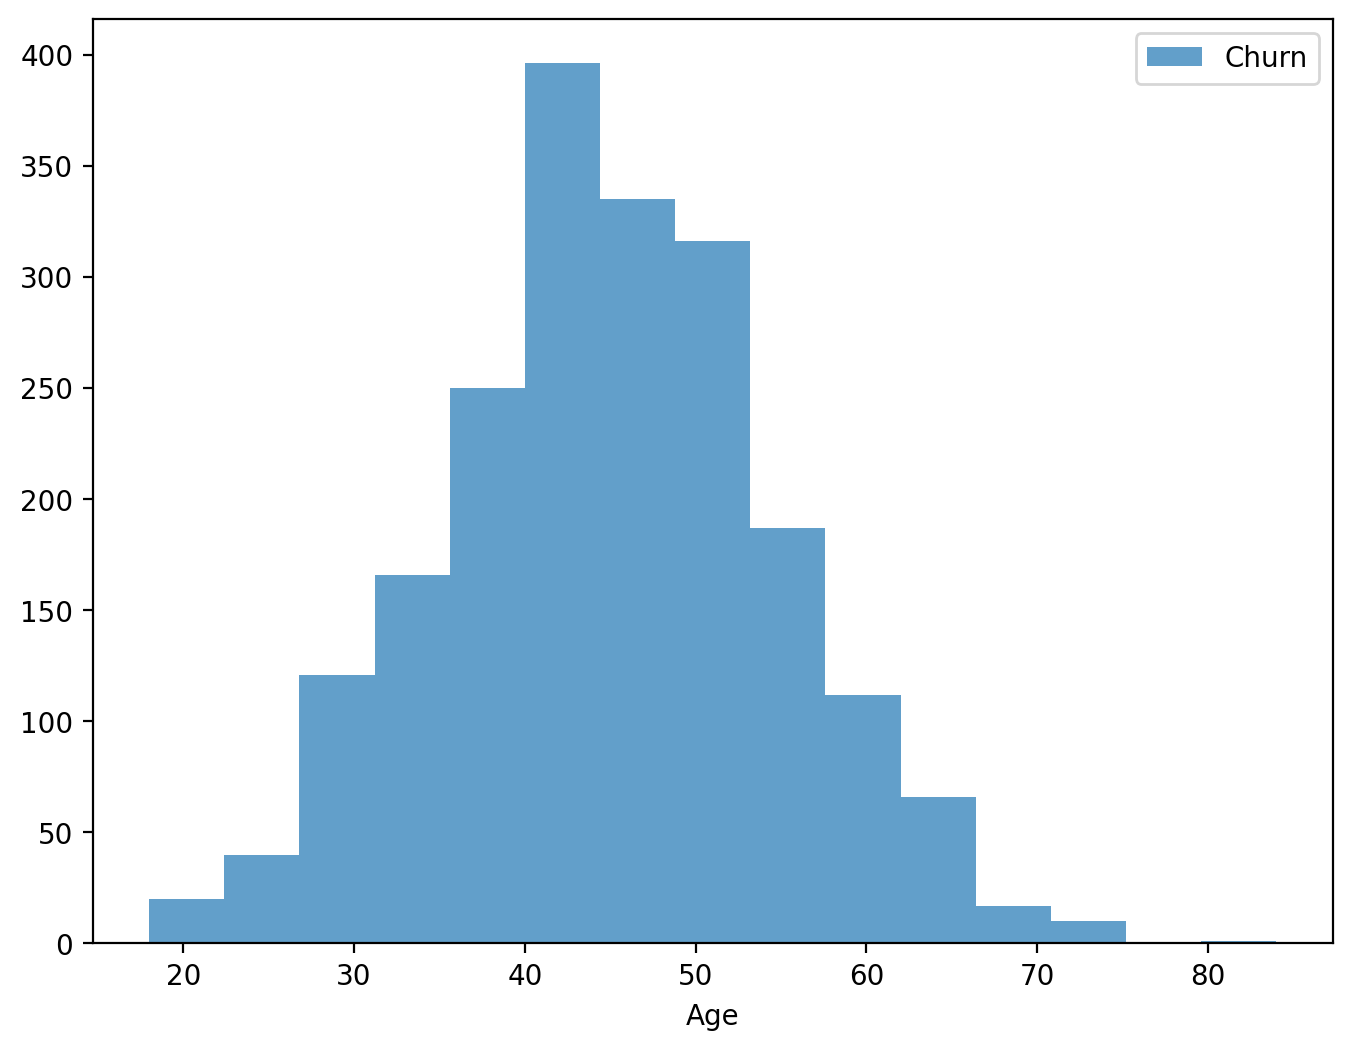

In [41]:
# distribution of the Age for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Age')
pyplot.hist(churn["Age"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

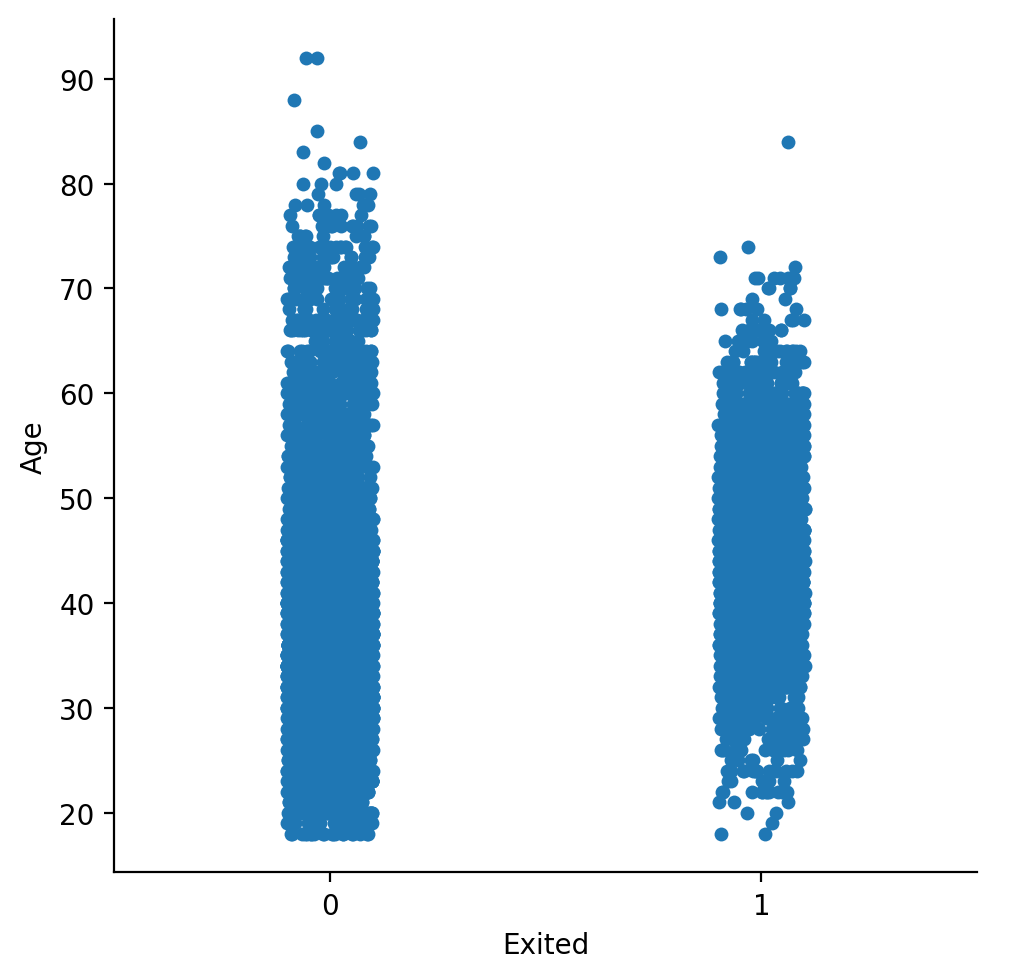

In [42]:
sns.catplot(x="Exited", y="Age", data = df)

## Balance

In [43]:
# Balance of the not_churn group
not_churn["Balance"].describe()

count      7963.000000
mean      72745.296779
std       62848.040701
min           0.000000
25%           0.000000
50%       92072.680000
75%      126410.280000
max      221532.800000
Name: Balance, dtype: float64

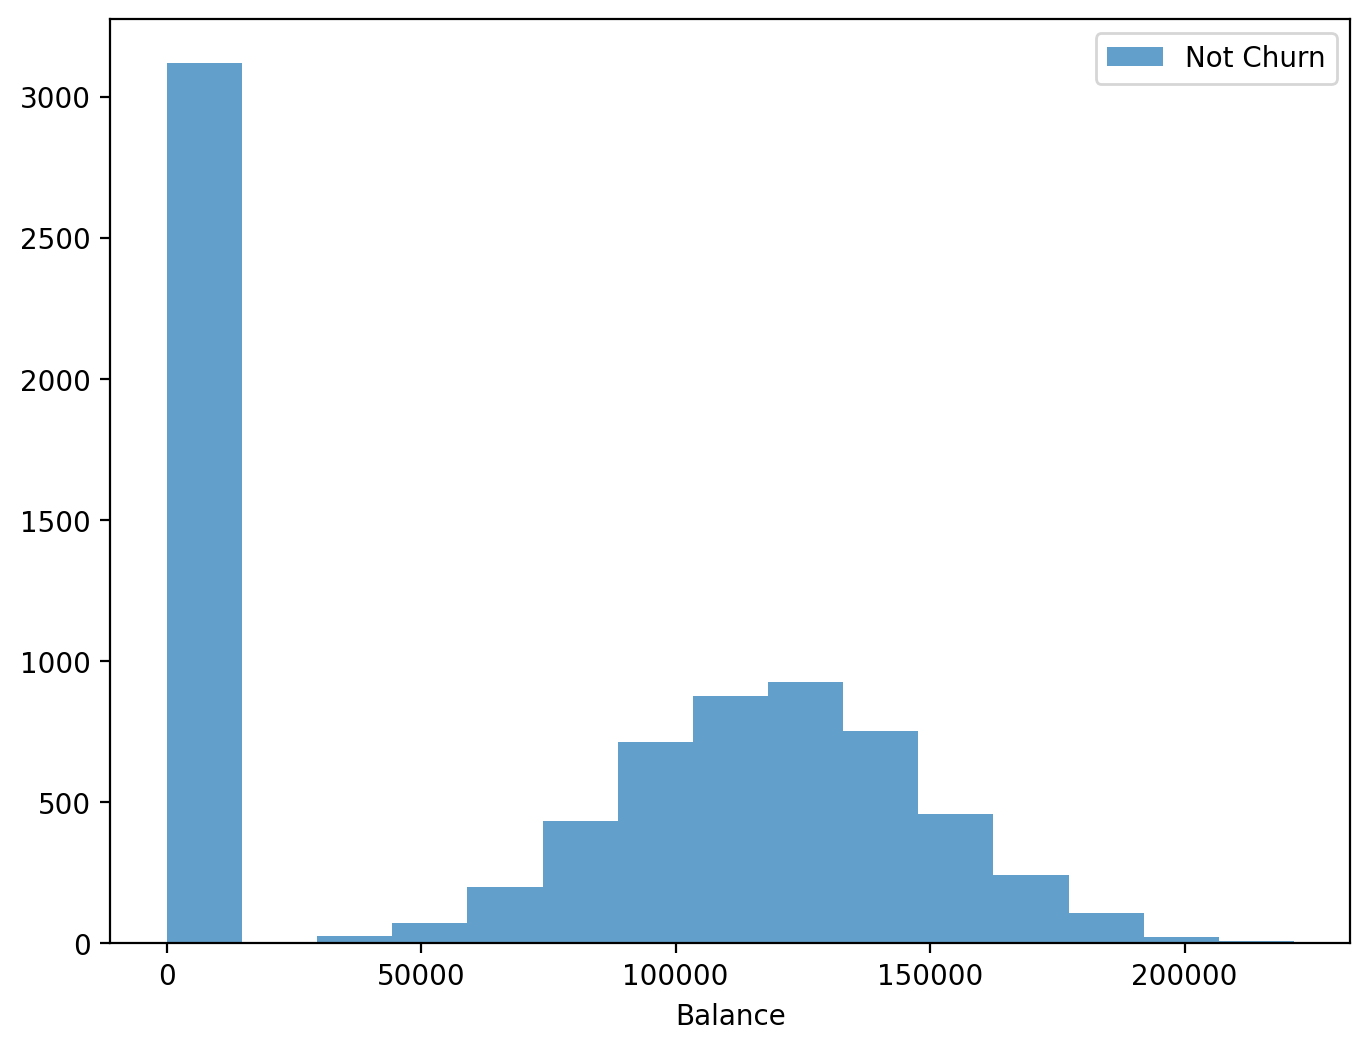

In [44]:
# distribution of the Balance for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Balance')
pyplot.hist(not_churn["Balance"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [45]:
# examining the Balance of the churn group
churn["Balance"].describe()

count      2037.000000
mean      91108.539337
std       58360.794816
min           0.000000
25%       38340.020000
50%      109349.290000
75%      131433.330000
max      250898.090000
Name: Balance, dtype: float64

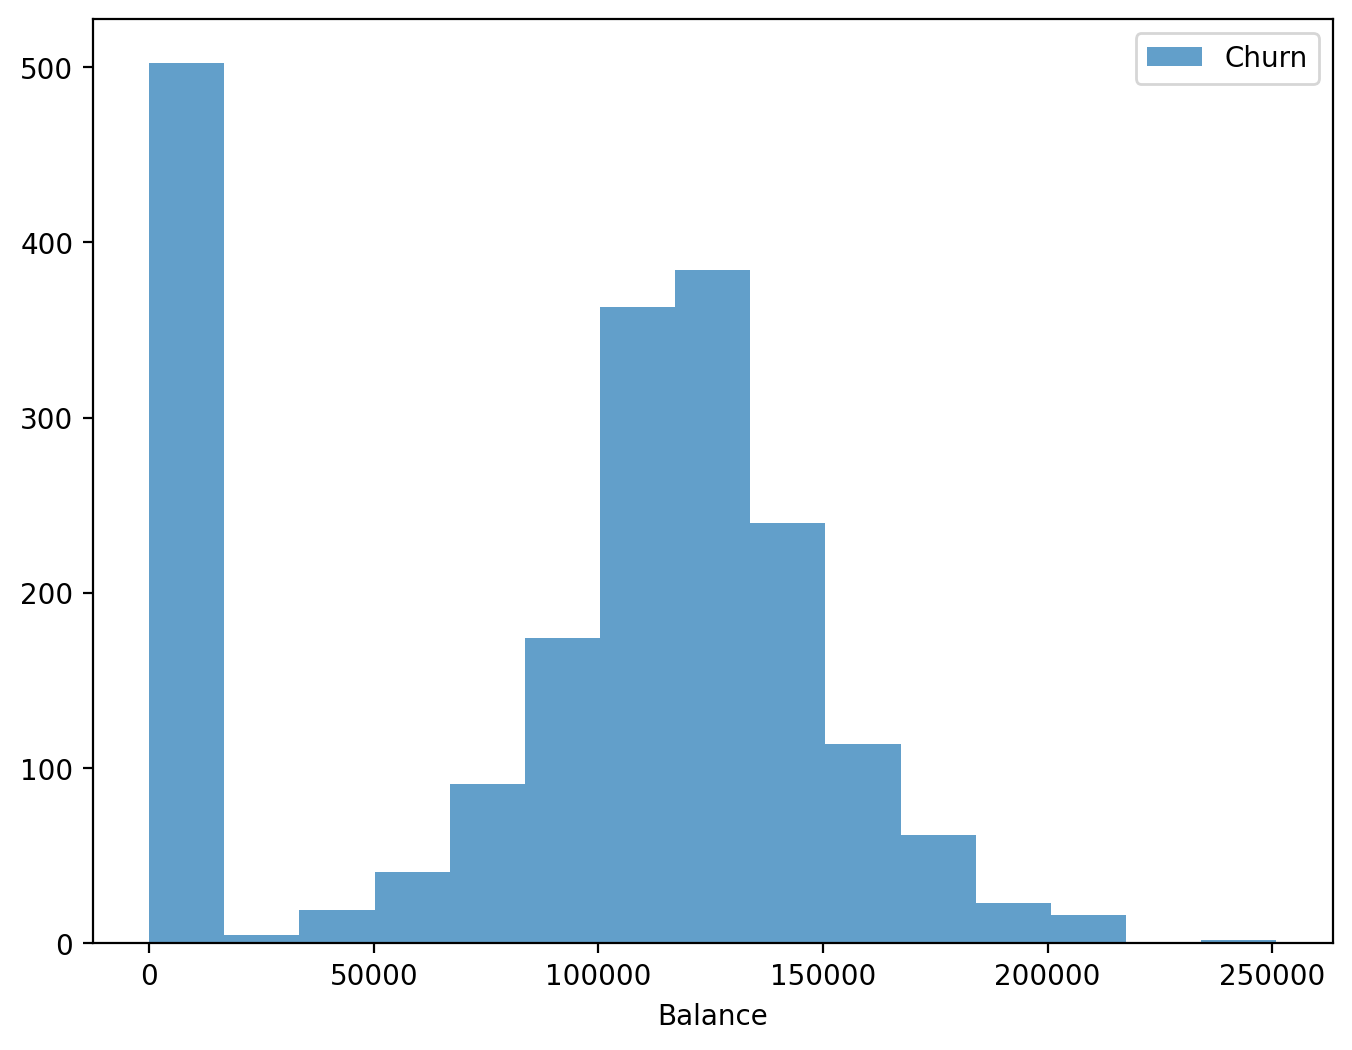

In [46]:
# distribution of the Balance for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Balance')
pyplot.hist(churn["Balance"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

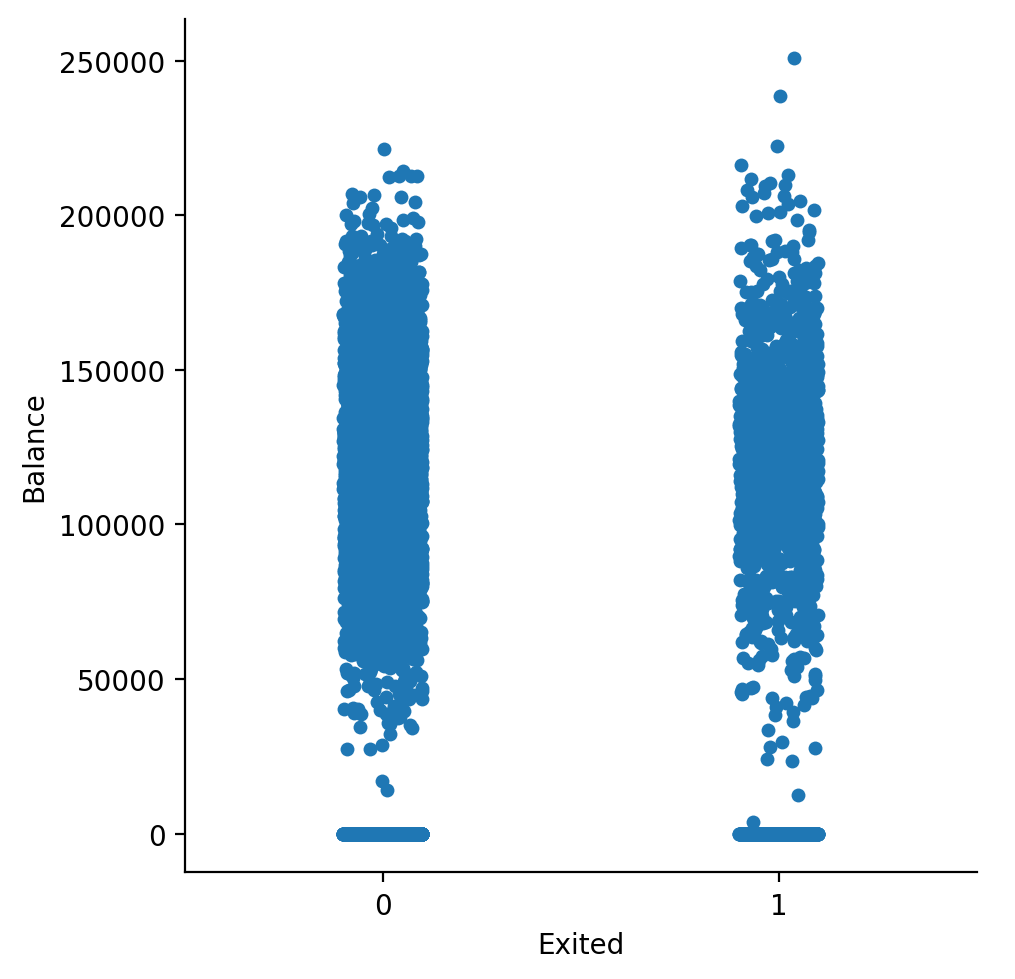

In [47]:
sns.catplot(x = "Exited", y ="Balance", data = df)

## EstimatedSalary

In [48]:
# examining the EstimatedSalary of the not_churn group
not_churn["EstimatedSalary"].describe()

count      7963.000000
mean      99738.391772
std       57405.586966
min          90.070000
25%       50783.490000
50%       99645.040000
75%      148609.955000
max      199992.480000
Name: EstimatedSalary, dtype: float64

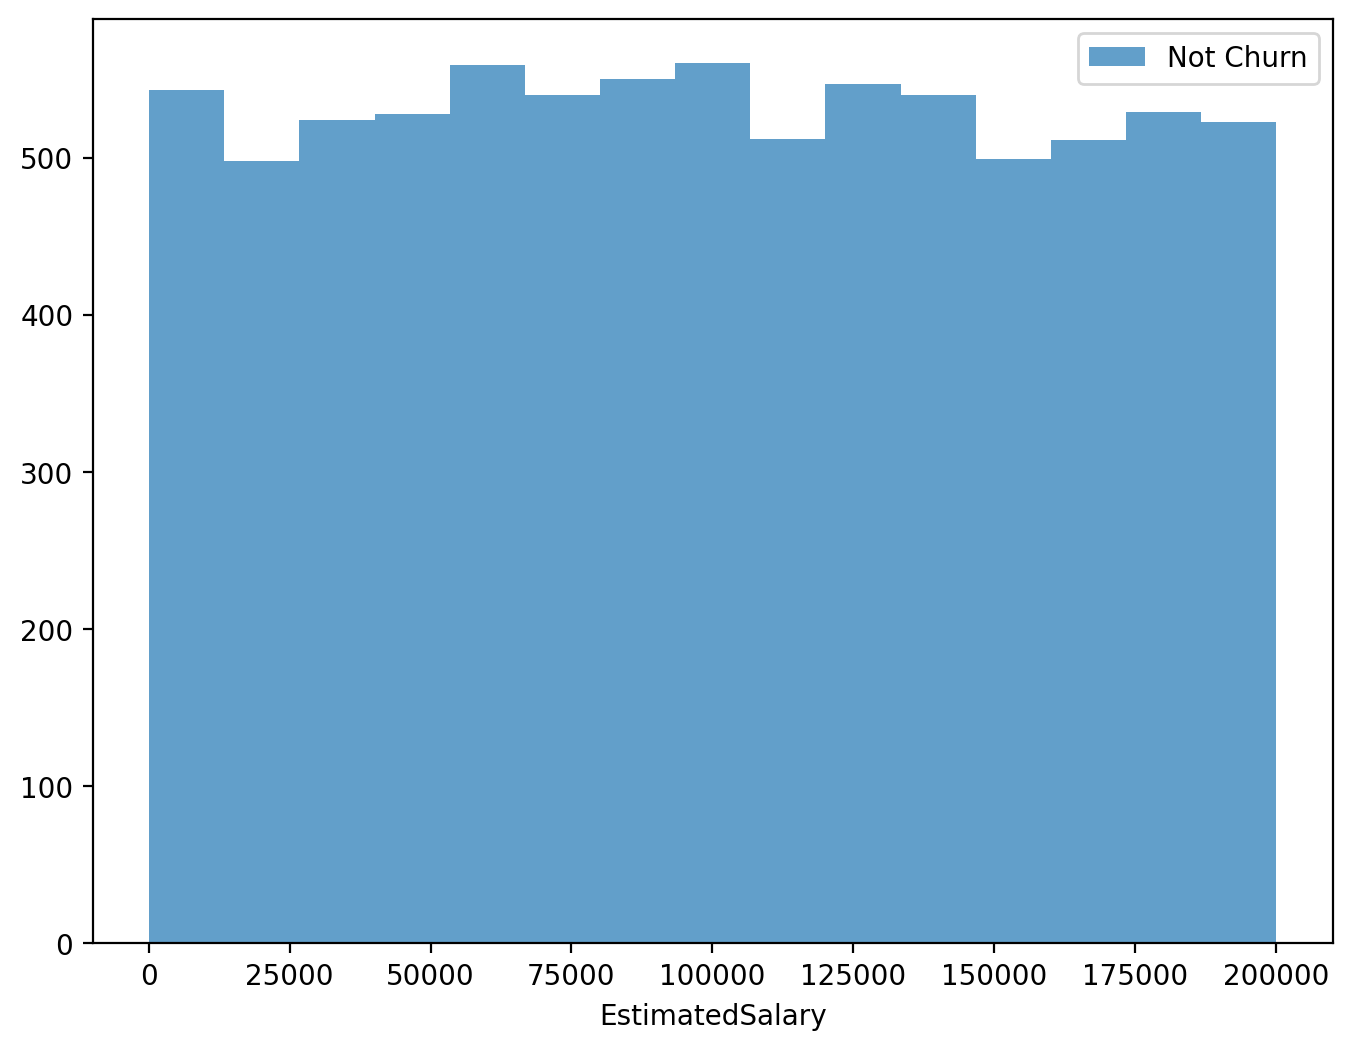

In [49]:
# distribution of the Balance for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('EstimatedSalary')
pyplot.hist(not_churn["EstimatedSalary"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [50]:
# examining the EstimatedSalary of the churn group
churn["EstimatedSalary"].describe()

count      2037.000000
mean     101465.677531
std       57912.418071
min          11.580000
25%       51907.720000
50%      102460.840000
75%      152422.910000
max      199808.100000
Name: EstimatedSalary, dtype: float64

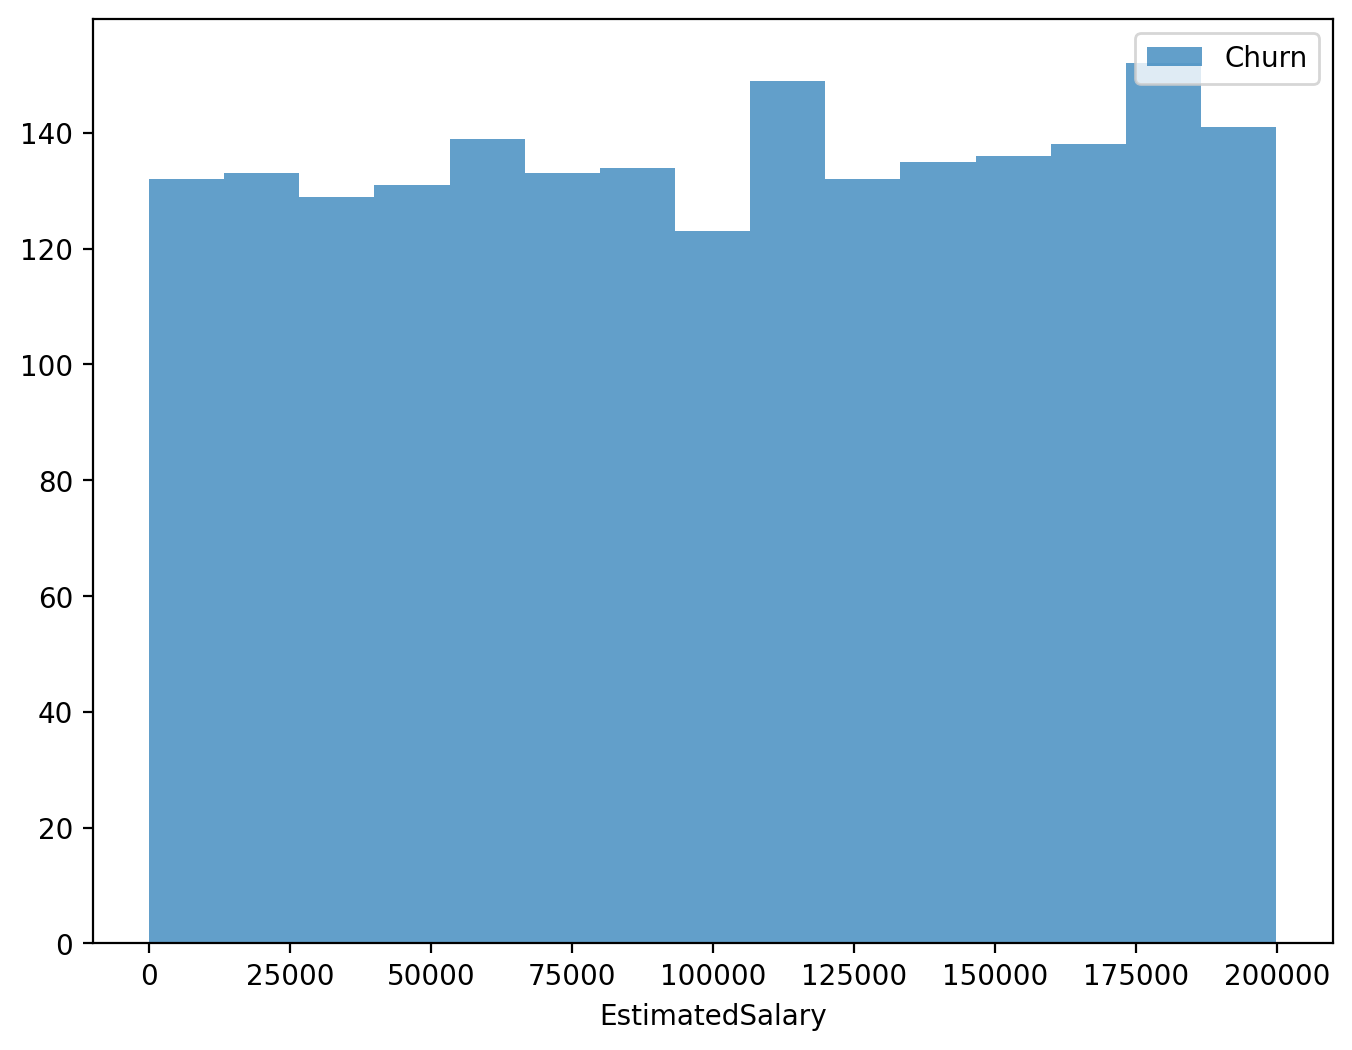

In [51]:
# distribution of the EstimatedSalary for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('EstimatedSalary')
pyplot.hist(churn["EstimatedSalary"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

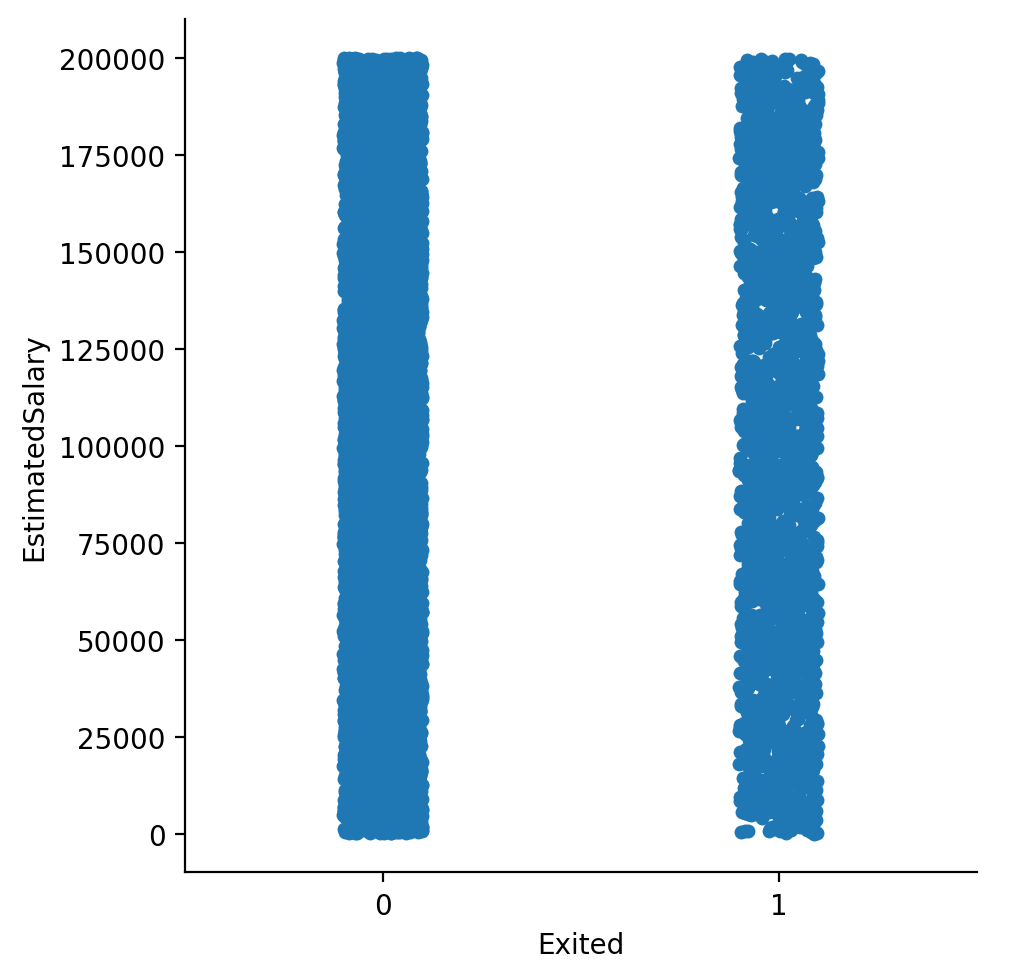

In [52]:
sns.catplot(x="Exited", y="EstimatedSalary", data = df)

# 2- Data Preprocessing

## Missing Value

In [54]:
# checking missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Outliers

In [55]:
# To determine the threshold value for outliers
def outlier_thresholds(data, variable, low_quantile=0.05, up_quantile=0.95):
    Q1 = data[variable].quantile(low_quantile)
    Q3 = data[variable].quantile(up_quantile)
    # finding interqualite range
    IQR = Q3 - Q1
    # finding upper and lower bounds
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    # returning thresholds
    return lower_bound, upper_bound 

In [56]:
# Are there any outliers in the variables
def has_outliers(dataframe, numeric_columns, plot=False):
    variable_names = []
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, " : ", number_of_outliers, "outliers")
            variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    return variable_names     

In [57]:
for var in numeric_variables:
    if has_outliers(df,[var])==[]:
        print(var, "has no outliers")
    else:
        print(var, "has " , has_outliers(df, [var]),  "Outliers")

RowNumber has no outliers
CreditScore has no outliers
Age has no outliers
Balance has no outliers
EstimatedSalary has no outliers


## Feature Engineering

In [58]:
# we standardize tenure with age
df["NewTenure"] = df["Tenure"]/df["Age"]
df["NewCreditsScore"] = pd.qcut(df['CreditScore'], 6, labels = [1, 2, 3, 4, 5, 6])
df["NewAgeScore"] = pd.qcut(df['Age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
df["NewBalanceScore"] = pd.qcut(df['Balance'].rank(method="first"), 5, labels = [1, 2, 3, 4, 5])
df["NewEstSalaryScore"] = pd.qcut(df['EstimatedSalary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [59]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,NewCreditsScore,NewAgeScore,NewBalanceScore,NewEstSalaryScore
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.047619,3,6,1,6
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.024390,2,6,3,6
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.190476,1,6,5,6
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.025641,5,5,1,5
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.046512,6,6,4,4


## One Hot Encoding

In [60]:
# Variables to apply one hot encoding using pandas get_dummies
list = ["Gender", "Geography"]
df = pd.get_dummies(df, columns =list, drop_first = True)

In [61]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,NewCreditsScore,NewAgeScore,NewBalanceScore,NewEstSalaryScore,Gender_Male,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0.047619,3,6,1,6,False,False,False
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,2,6,3,6,False,False,True
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,1,6,5,6,False,False,False
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0.025641,5,5,1,5,False,False,False
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,6,6,4,4,False,False,True


# Scalling

In [62]:
# Removing variables that will not affect the dependent variable
df = df.drop(["CustomerId","Surname"], axis = 1)

In [63]:
# Scale features using statistics that are robust to outliers.
def robust_scaler(variable):
    var_median = variable.median()
    Q1 = variable.quantile(0.25)
    Q3 = variable.quantile(0.75)
    IQR = Q3 - Q1
    if int(IQR) == 0:
        Q1 = variable.quantile(0.05)
        Q3 = variable.quantile(0.95)
        IQR = Q3 - Q1
        if int(IQR) == 0:
            Q1 = variable.quantile(0.01)
            Q3 = variable.quantile(0.99)
            IQR = Q3 - Q1
            z = (variable - var_median) / IQR
            return round(z, 3)

        z = (variable - var_median) / IQR
        return round(z, 3)
    else:
        z = (variable - var_median) / IQR
    return round(z, 3)

In [64]:
new_cols_ohe = ["Gender_Male","Geography_Germany","Geography_Spain"]
like_num = [col for col in df.columns if df[col].dtypes != 'O' and len(df[col].value_counts()) <= 10]
cols_need_scale = [col for col in df.columns if col not in new_cols_ohe
                   and col not in "Exited"
                   and col not in like_num]

for col in cols_need_scale:
    df[col] = robust_scaler(df[col])

In [65]:
df.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,NewCreditsScore,NewAgeScore,NewBalanceScore,NewEstSalaryScore,Gender_Male,Geography_Germany,Geography_Spain
0,-1.000,-0.246,0.417,-0.75,-0.761,1,1,1,0.012,1,-0.217,3,6,1,6,False,False,False
1,-1.000,-0.328,0.333,-1.00,-0.105,1,0,1,0.126,0,-0.279,2,6,3,6,False,False,True
2,-1.000,-1.119,0.417,0.75,0.489,3,1,0,0.140,1,0.164,1,6,5,6,False,False,False
3,-0.999,0.351,0.167,-1.00,-0.761,2,0,0,-0.065,0,-0.276,5,5,1,5,False,False,False
4,-0.999,1.478,0.500,-0.75,0.222,1,1,1,-0.215,0,-0.220,6,6,4,4,False,False,True


# 3- Modeling

In [68]:
# creating the X and y variables
X = df.drop("Exited",axis=1)
y = df["Exited"]
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Models for Classification
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('SVR', SVC()),
          ('GB', GradientBoostingClassifier())]
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True,random_state=42)
    cv_results = cross_val_score(model, X, y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.823800 (0.011187)
KNN: 0.820200 (0.010787)
CART: 0.787600 (0.011473)
RF: 0.861700 (0.008367)
SVR: 0.835600 (0.009851)
GB: 0.864600 (0.010032)


In [72]:
# GB Confusion Matrix
model_GB = GradientBoostingClassifier(random_state=42)
model_GB.fit(X_train, y_train)
y_pred = model_GB.predict(X_test)
conf_mat = confusion_matrix(y_pred,y_test)
conf_mat

array([[1541,  204],
       [  66,  189]], dtype=int64)

In [73]:
print("True Positive : ", conf_mat[1, 1])
print("True Negative : ", conf_mat[0, 0])
print("False Positive: ", conf_mat[0, 1])
print("False Negative: ", conf_mat[1, 0])

True Positive :  189
True Negative :  1541
False Positive:  204
False Negative:  66


In [74]:
# Classification Report for XGB Model
print(classification_report(model_GB.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1745
           1       0.48      0.74      0.58       255

    accuracy                           0.86      2000
   macro avg       0.72      0.81      0.75      2000
weighted avg       0.90      0.86      0.88      2000

